In [0]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [0]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [0]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 210us/step - loss: 0.5049 - acc: 0.7873 - val_loss: 0.3779 - val_acc: 0.8705
Epoch 2/20
15000/15000 [==============================] - 2s 160us/step - loss: 0.2993 - acc: 0.9044 - val_loss: 0.3002 - val_acc: 0.8891
Epoch 3/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.2173 - acc: 0.9283 - val_loss: 0.3076 - val_acc: 0.8720
Epoch 4/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.1746 - acc: 0.9435 - val_loss: 0.2827 - val_acc: 0.8846
Epoch 5/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.1420 - acc: 0.9541 - val_loss: 0.2857 - val_acc: 0.8856
Epoch 6/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.1147 - acc: 0.9652 - val_loss: 0.3133 - val_acc: 0.8786
Epoch 7/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.0976 - acc: 0.9709 - val_loss: 0.3133 - 

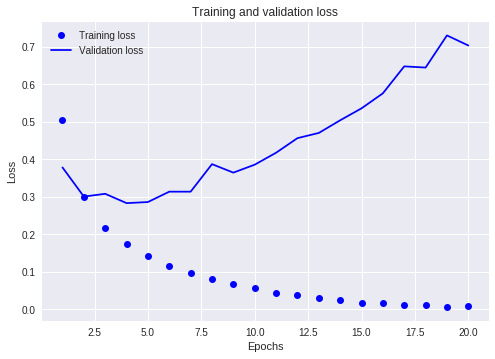

In [0]:
import matplotlib.pyplot as plt
acc=history.history['acc']
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

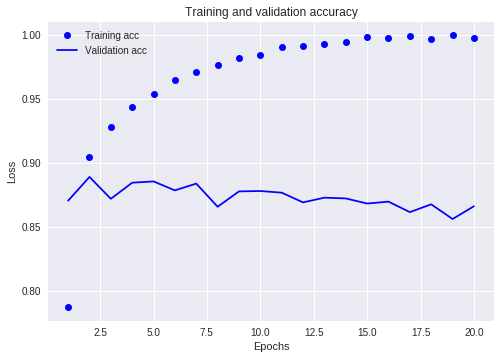

In [0]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()